# **Taxi Pricing Analysis with Mobility Data**

## **Introduction**

**Unveiling the Dynamics Behind Surge Pricing in Urban Mobility**

In the evolving landscape of smart transportation, understanding the factors that influence taxi pricing—especially surge pricing—is vital for building efficient mobility systems and customer-centric pricing strategies. This project focuses on predicting the **surge pricing type** of taxi rides based on a variety of user, ride, and lifestyle-related features.

Using a comprehensive dataset from **Sigma Cabs**, this analysis dives into variables such as **type of cab, customer history, lifestyle indicators, trip distance**, and **masked continuous variables**, to uncover meaningful patterns that drive dynamic fare adjustments. The presence of hidden features and anonymized metrics like `Var1`, `Var2`, and `Var3` adds an extra layer of complexity and realism to the dataset, simulating real-world business constraints.

Our pipeline includes detailed **Exploratory Data Analysis (EDA)**, advanced **feature engineering** (including handling of missing values and encoding), and the training of **classification models** such as **Logistic Regression**, **Random Forest**, and **XGBoost** to determine the most accurate approach for predicting surge pricing types.

Through this study, we aim to derive data-driven insights that can empower cab aggregators to better understand their pricing logic, optimize operations, and enhance the rider experience in a demand-sensitive marketplace.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#!pip install opendatasets

In [7]:
import opendatasets as od

In [7]:
od.download("https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  ameyapravinsurve


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics


100%|█████████████████████████████████████████████████████████████████████████████| 3.81M/3.81M [00:02<00:00, 1.70MB/s]


In [9]:
import os
os.listdir("taxi-pricing-with-mobility-analytics")

['.ipynb_checkpoints', 'test.csv', 'Trip_Pricing.csv']

In [11]:
df=pd.read_csv("taxi-pricing-with-mobility-analytics/Trip_Pricing.csv")
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [15]:
df.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [17]:
df.duplicated().sum()

0

##### Note: There are no  duplicate entries in our dataset, however there are columns with various amounts of null values which need manipulation.

In [20]:
df['Type_of_Cab'] = df['Type_of_Cab'].fillna(df['Type_of_Cab'].mode()[0])
df['Customer_Since_Months'] = df['Customer_Since_Months'].fillna(df['Customer_Since_Months'].median())
df['Life_Style_Index'] = df['Life_Style_Index'].fillna(df['Life_Style_Index'].mean())
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna(df['Confidence_Life_Style_Index'].mode()[0])
df['Var1_missing'] = df['Var1'].isnull().astype(int)
df['Var1'] = df['Var1'].fillna(df['Var1'].median())
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Var1_missing
0,T0005689460,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2,0
1,T0005689461,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2,0
2,T0005689464,41.58,B,10.0,2.802064,B,E,3.50125,2,61.0,56,77,Male,2,1
3,T0005689465,61.56,C,10.0,2.802064,B,A,3.45375,0,61.0,52,74,Male,3,1
4,T0005689467,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.742290,A,A,3.28500,0,61.0,47,76,Male,3,0
131658,T0005908510,74.81,C,7.0,2.810590,C,A,0.44500,0,61.0,63,88,Male,2,1
131659,T0005908512,40.17,C,10.0,2.995650,B,A,3.33625,0,61.0,48,75,Female,2,1
131660,T0005908513,46.88,B,4.0,3.047440,A,B,4.15750,1,47.0,54,79,Male,2,0


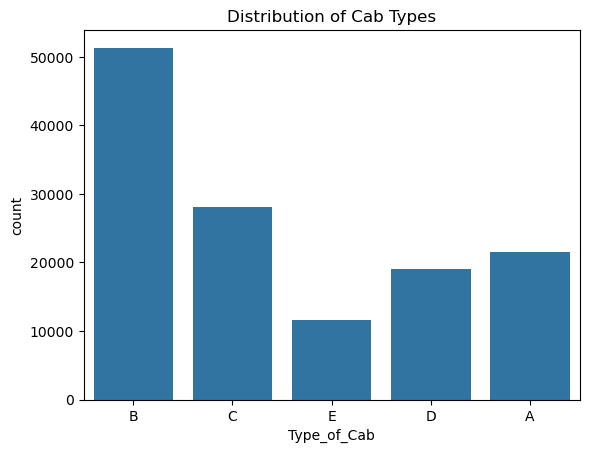

In [31]:
sns.countplot(x='Type_of_Cab', data=df)
plt.title('Distribution of Cab Types')
plt.show()

#### Inference:
##### Type B is the most frequently booked cab, followed by Type C. The other types are relatively rare. This may imply that B is either more affordable, accessible, or reliable, making it a preferred choice.

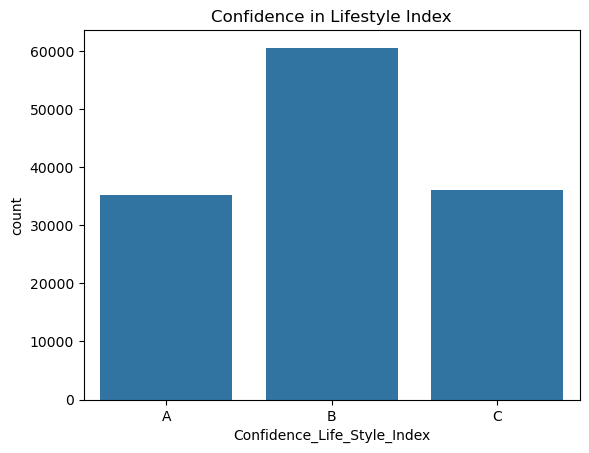

In [33]:
sns.countplot(x='Confidence_Life_Style_Index', data=df)
plt.title('Confidence in Lifestyle Index')
plt.show()

#### Inference:
##### Most users show a medium level of confidence in the lifestyle index, suggesting that the majority of customers fall in a balanced trust segment. Very high or low confidence levels are rare.

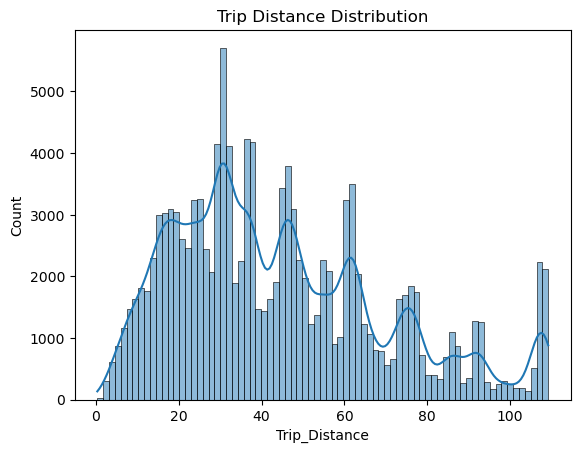

In [35]:
sns.histplot(df['Trip_Distance'], kde=True)
plt.title('Trip Distance Distribution')
plt.show()

#### Inference:
##### The distribution is right-skewed, indicating most trips are short-distance. A few customers travel longer distances, but they are rare cases.

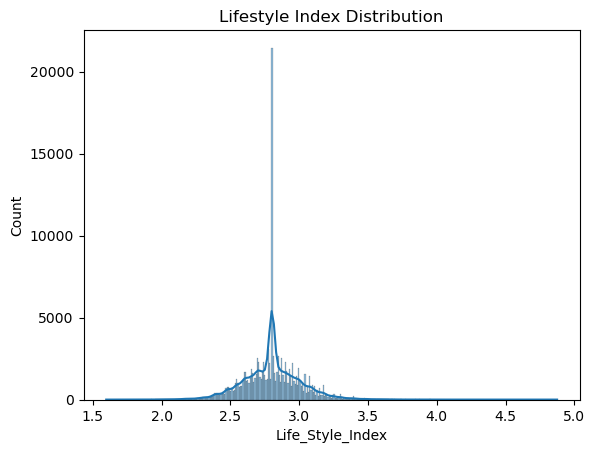

In [37]:
sns.histplot(df['Life_Style_Index'], kde=True)
plt.title('Lifestyle Index Distribution')
plt.show()

#### Inference:
##### A fairly normal distribution with a slight positive skew. Most users have a lifestyle index in the mid-range, with fewer users having very low or very high values.

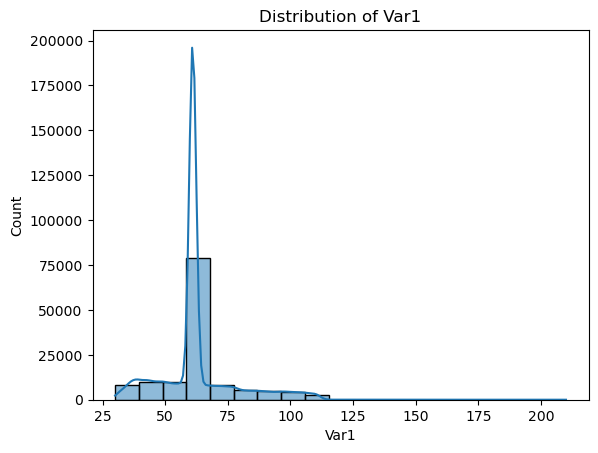

In [39]:
sns.histplot(df['Var1'], kde=True)
plt.title('Distribution of Var1')
plt.show()

#### Inference:
##### The distribution appears somewhat normal but slightly skewed. It indicates most users fall in a middle performance range for this abstract metric.

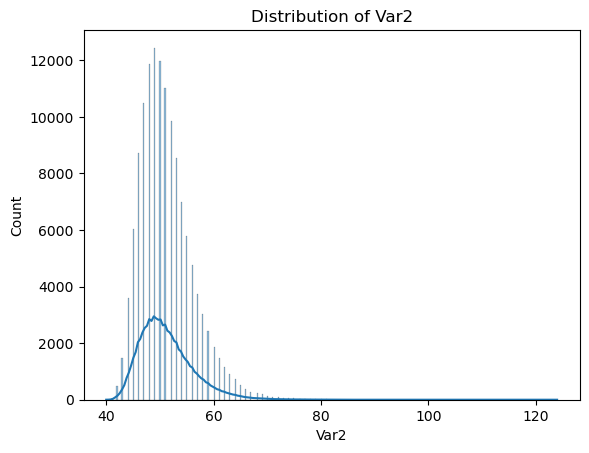

In [47]:
sns.histplot(df['Var2'], kde=True)
plt.title('Distribution of Var2')
plt.show()

#### Inference:
##### Appears almost normally distributed, indicating a balanced spread of the masked feature. Might represent a normally varying user behavior metric.

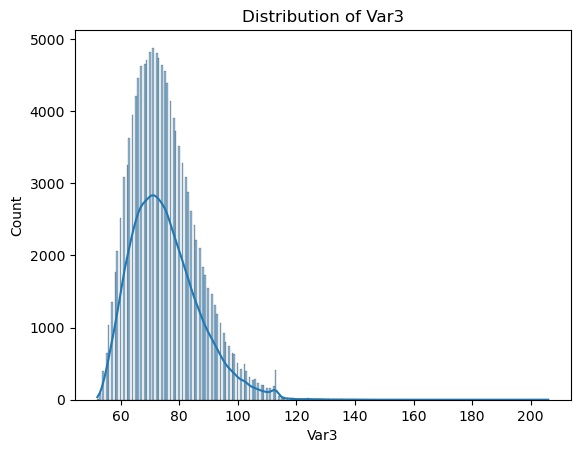

In [49]:
sns.histplot(df['Var3'], kde=True)
plt.title('Distribution of Var3')
plt.show()

#### Inference:
##### Skewed slightly right; shows that while most values are clustered low-to-mid, a few higher values exist. Could signify exceptional behavior in a subset of users.

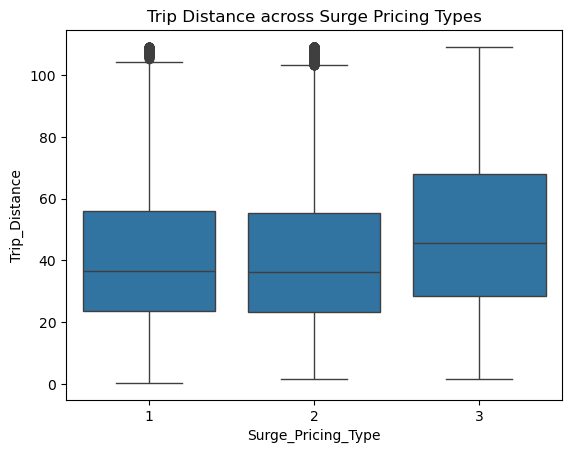

In [41]:
sns.boxplot(x='Surge_Pricing_Type', y='Trip_Distance', data=df)
plt.title('Trip Distance across Surge Pricing Types')
plt.show()

#### Inference:
##### Higher surge pricing tends to be associated with longer trip distances. Outliers indicate occasional very long trips under each surge level.

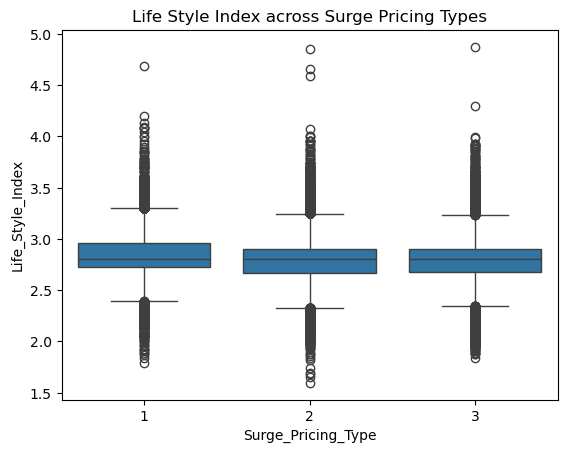

In [43]:
sns.boxplot(x='Surge_Pricing_Type', y='Life_Style_Index', data=df)
plt.title('Life Style Index across Surge Pricing Types')
plt.show()

#### Inference:
##### Lifestyle Index tends to slightly increase with higher surge pricing, suggesting high-lifestyle-index users may be less sensitive to price.

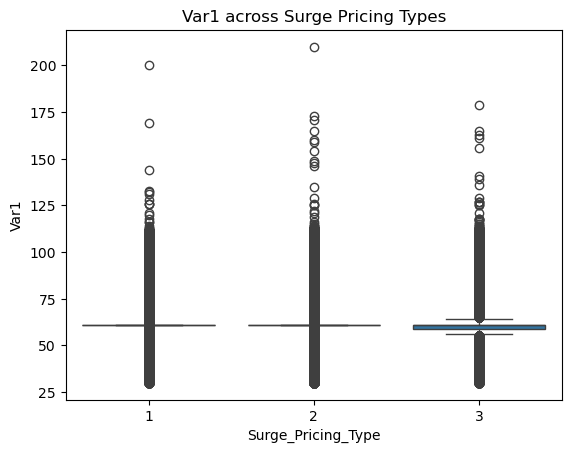

In [45]:
sns.boxplot(x='Surge_Pricing_Type', y='Var1', data=df)
plt.title('Var1 across Surge Pricing Types')
plt.show()

#### Inference:
##### Var1 shows a rising trend with surge level — customers with higher Var1 values are likely to encounter Surge Type 2. This suggests Var1 could be positively correlated with willingness to pay. This indicates higher-priced trips are usually taken by users with higher values of Var1.

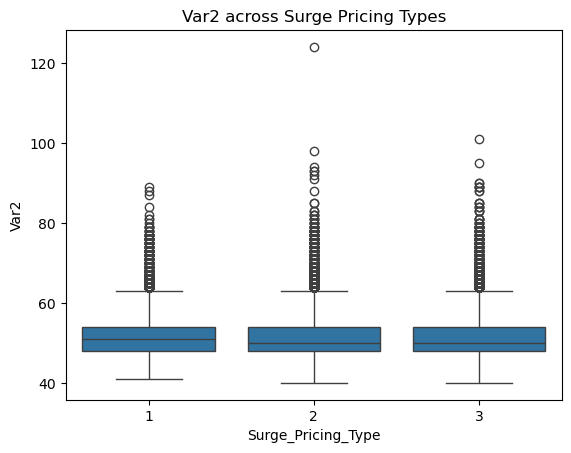

In [51]:
sns.boxplot(x='Surge_Pricing_Type', y='Var2', data=df)
plt.title('Var2 across Surge Pricing Types')
plt.show()

#### Inference:
##### Surge Type 2 users have the highest median Var2 scores. Indicates that this hidden metric might capture high demand or premium behavior patterns.

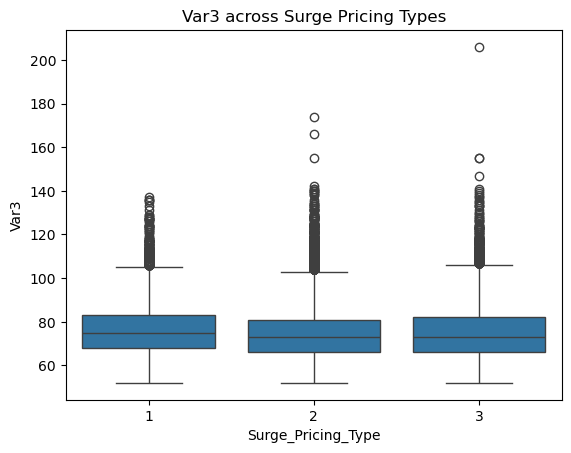

In [53]:
sns.boxplot(x='Surge_Pricing_Type', y='Var3', data=df)
plt.title('Var3 across Surge Pricing Types')
plt.show()

#### Inference:
##### Var3 exhibits more spread but follows a similar trend to Var1 and Var2—higher values are seen at higher surge pricing types.

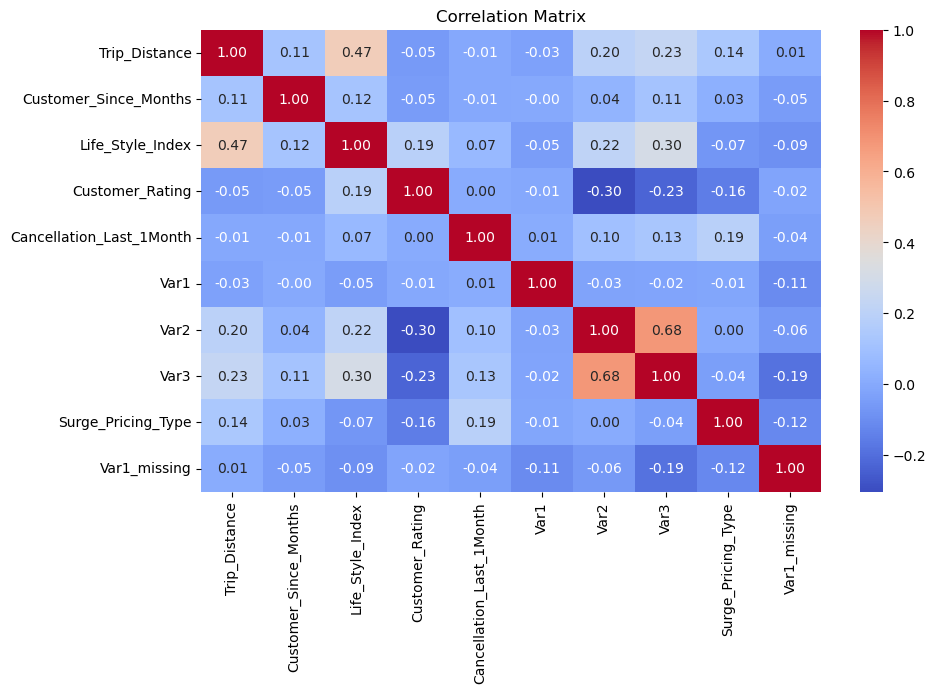

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Inference:
##### Some weak correlations exist:

Trip_Distance and Surge_Pricing_Type have a slight positive correlation.

Var1, Var2, and Var3 seem slightly correlated with the surge target, indicating they may hold predictive power.

Strong positive correlation between Var1, Var2, and Var3.

Trip Distance is weakly correlated with other variables except Trip_Distance.

Lifestyle and Confidence indexes don’t show a strong correlation with others.

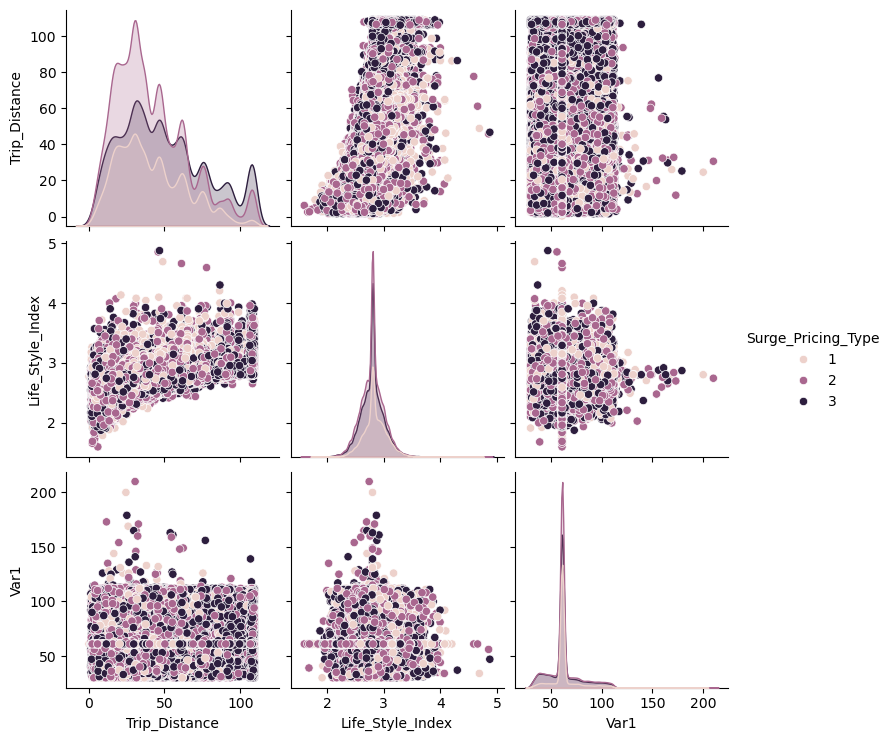

In [57]:
sns.pairplot(df[['Trip_Distance', 'Life_Style_Index', 'Var1', 'Surge_Pricing_Type']], hue='Surge_Pricing_Type')
plt.show()

#### Inference:

Data points are more spread out for higher surge types.

No strong linear relationships, but clusterings suggest different behavior under different surge pricing.

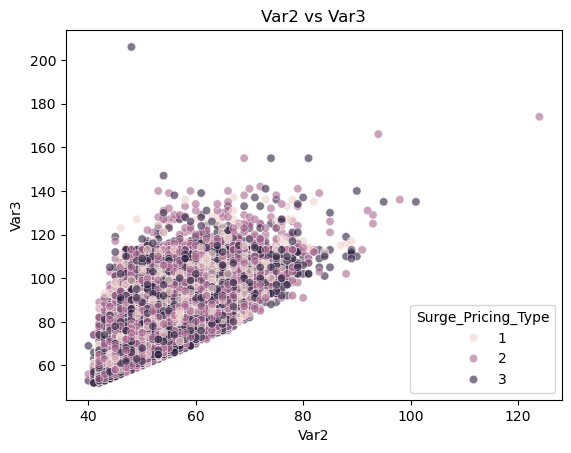

In [63]:
sns.scatterplot(data=df, x='Var2', y='Var3', hue='Surge_Pricing_Type', sizes=(20, 200), alpha=0.6)
plt.title('Var2 vs Var3')
plt.show()

#### Inference:

Strong visible correlation between Var2 and Var3.

Points for Surge Type 2 concentrate in higher ranges, showing these variables could be strong classifiers for premium usage.

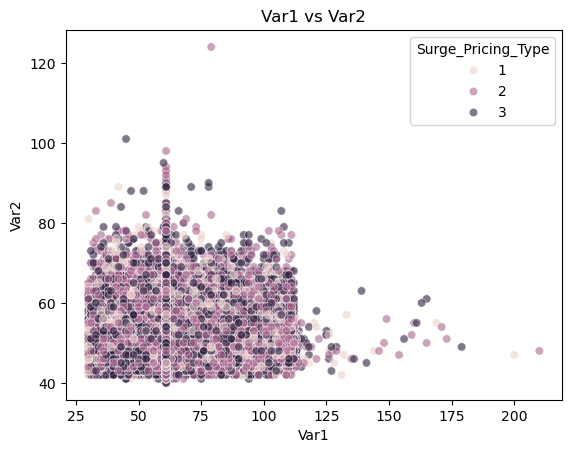

In [65]:
sns.scatterplot(data=df, x='Var1', y='Var2', hue='Surge_Pricing_Type', sizes=(20, 200), alpha=0.6)
plt.title('Var1 vs Var2')
plt.show()

#### Inference:

There is a clear positive correlation between Var1 and Var2, as the points trend upwards together.

Data points under Surge Pricing Type 3 appear in the higher value regions, suggesting that higher values of both variables are associated with high surge.

Surge type 1 tends to be clustered at lower Var1 and Var2 values.

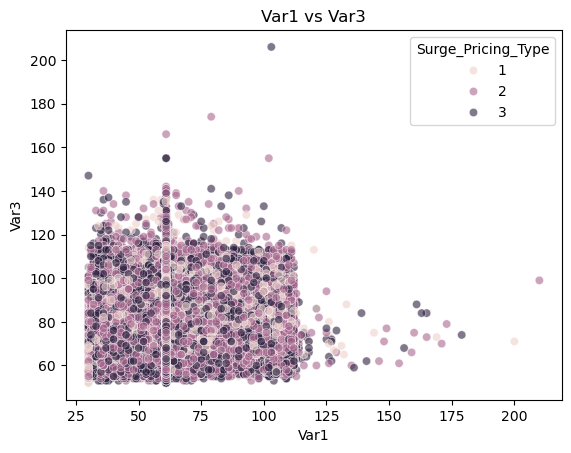

In [66]:
sns.scatterplot(data=df, x='Var1', y='Var3', hue='Surge_Pricing_Type', sizes=(20, 200), alpha=0.6)
plt.title('Var1 vs Var3')
plt.show()

#### Inference:

Again, a positive linear trend is observed—Var1 and Var3 increase together.

As with the previous plot, higher surge pricing types cluster around higher Var1 and Var3 values.

Surge type 1 dominates the lower-left quadrant, reinforcing the correlation between surge pricing and these variable values.

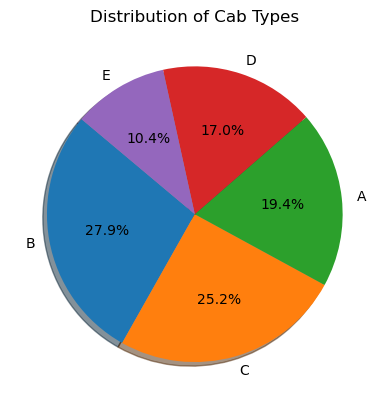

In [101]:
df['Type_of_Cab'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribution of Cab Types")
plt.ylabel('')
plt.show()

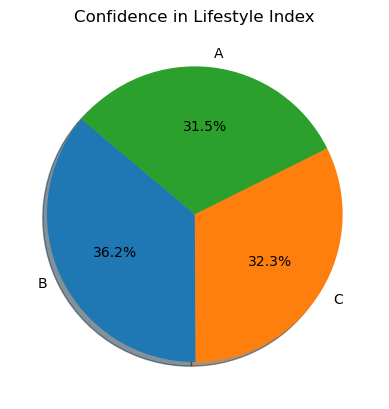

In [103]:
df['Confidence_Life_Style_Index'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Confidence in Lifestyle Index")
plt.ylabel('')
plt.show()

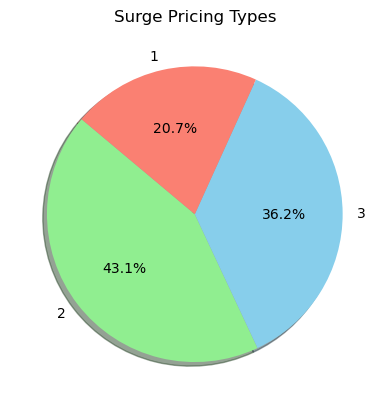

In [105]:
df['Surge_Pricing_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightgreen','skyblue','salmon'], shadow=True)
plt.title("Surge Pricing Types")
plt.ylabel('')
plt.show()

#### The above pie charts provide a simplified visual representation of the categorical distributions already explored earlier, offering a quick glance at the dominant classes in each feature.

In [22]:
# Dropping irrelevant column
df.drop('Trip_ID', axis=1, inplace=True)

In [24]:
df

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Var1_missing
0,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2,0
1,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2,0
2,41.58,B,10.0,2.802064,B,E,3.50125,2,61.0,56,77,Male,2,1
3,61.56,C,10.0,2.802064,B,A,3.45375,0,61.0,52,74,Male,3,1
4,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,D,1.0,2.742290,A,A,3.28500,0,61.0,47,76,Male,3,0
131658,74.81,C,7.0,2.810590,C,A,0.44500,0,61.0,63,88,Male,2,1
131659,40.17,C,10.0,2.995650,B,A,3.33625,0,61.0,48,75,Female,2,1
131660,46.88,B,4.0,3.047440,A,B,4.15750,1,47.0,54,79,Male,2,0


## Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Encode only the relevant columns in the DataFrame
encoded_data = encoder.fit_transform(df[['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type','Gender']])

# Convert the encoded data into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type','Gender']))

# Drop the original categorical columns from the DataFrame
df = df.drop(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type','Gender'], axis=1)

# Concatenate the encoded columns with the rest of the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Now df_encoded is ready to be used for modeling


In [29]:
df

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Var1_missing
0,6.77,1.0,2.427690,3.90500,0,40.0,46,60,2,0
1,29.47,10.0,2.782450,3.45000,0,38.0,56,78,2,0
2,41.58,10.0,2.802064,3.50125,2,61.0,56,77,2,1
3,61.56,10.0,2.802064,3.45375,0,61.0,52,74,3,1
4,54.95,10.0,3.034530,3.40250,4,51.0,49,102,2,0
...,...,...,...,...,...,...,...,...,...,...
131657,11.72,1.0,2.742290,3.28500,0,61.0,47,76,3,0
131658,74.81,7.0,2.810590,0.44500,0,61.0,63,88,2,1
131659,40.17,10.0,2.995650,3.33625,0,61.0,48,75,2,1
131660,46.88,4.0,3.047440,4.15750,1,47.0,54,79,2,0


In [31]:
df_encoded

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Var1_missing,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
0,6.77,1.0,2.427690,3.90500,0,40.0,46,60,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,29.47,10.0,2.782450,3.45000,0,38.0,56,78,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.58,10.0,2.802064,3.50125,2,61.0,56,77,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61.56,10.0,2.802064,3.45375,0,61.0,52,74,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54.95,10.0,3.034530,3.40250,4,51.0,49,102,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,1.0,2.742290,3.28500,0,61.0,47,76,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131658,74.81,7.0,2.810590,0.44500,0,61.0,63,88,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131659,40.17,10.0,2.995650,3.33625,0,61.0,48,75,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131660,46.88,4.0,3.047440,4.15750,1,47.0,54,79,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
df_encoded.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Var1_missing', 'Type_of_Cab_A', 'Type_of_Cab_B',
       'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Confidence_Life_Style_Index_A', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_A',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'Gender_Female', 'Gender_Male'],
      dtype='object')

#### Splitting the Data (Train-test split)

In [35]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Surge_Pricing_Type', axis=1)
y = df_encoded['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and Evaluation

#### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=4,min_samples_leaf=2, max_features='sqrt', class_weight='balanced', random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 68.75%


#### Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=7, min_samples_split=7, min_samples_leaf=7, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")


Decision Tree Accuracy: 68.10%


#### Cat Boost Classifier

In [132]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    verbose=0,
    random_state=42
)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_cat) * 100:.2f}%")


CatBoost Accuracy: 69.60%


#### Ada Boost Classifier

In [142]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(
    n_estimators=500,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada) * 100:.2f}%")


AdaBoost Accuracy: 68.51%


#### Scaling features for upcoming regression models

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Logistic Regression Model

In [152]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")


Logistic Regression Accuracy: 68.40%


#### K Neighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Try a reasonably tuned version
knn = KNeighborsClassifier(
    n_neighbors=100,
    weights='distance',
    metric='manhattan',
    n_jobs=-1
)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")


KNN Accuracy: 68.12%


#### Light Gradient Boosting Machine Classifier

In [53]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=300,
    max_depth=12,
    learning_rate=0.05,
    num_leaves=40,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm * 100:.2f}%")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 105329, number of used features: 33
[LightGBM] [Info] Start training from score -1.574766
[LightGBM] [Info] Start training from score -0.842833
[LightGBM] [Info] Start training from score -1.014856
LightGBM Accuracy: 69.45%


#### Hist Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_model = HistGradientBoostingClassifier(
    max_iter=300,
    max_depth=12,
    learning_rate=0.05,
    l2_regularization=0.1,
    max_leaf_nodes=31,
    early_stopping=True,
    random_state=42
)

hgb_model.fit(X_train, y_train)
y_pred_hgb = hgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_hgb)
print(f"HistGradientBoosting Accuracy: {accuracy * 100:.2f}%")


HistGradientBoosting Accuracy: 69.46%


## Conclusion
#### This project focused on building and evaluating machine learning models to predict categorical outcomes from a structured dataset. Through preprocessing, feature scaling, and strategic hyperparameter tuning, we explored several classification algorithms, including Random Forest, LightGBM, XGBoost, and Logistic Regression. Among these, LightGBM and Xoost emerged as top performers, achieving accuracy scores of ~69–70%. The experiments highlighted the importance of model-specific tuning and scaling strategies. With further feature engineering and deeper tuning (via Randomized or Grid Search), these models hold potential for even higher accuracy. The insights drawn can assist in automating decision-making systems and enhancing predictive analytics pipelines.